
### Logistic Regression with ROC curve and ROC AUC Score

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, random_state=40)



In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(670, 20) (330, 20) (670,) (330,)


creating Dummy model with output of ZEROs '0'

In [4]:
dummy_model_prob = [0 for _ in range(len(y_test))]

### Hyperparameter tunning

In [5]:
logistic = LogisticRegression()
penalty = ['l1','l2','elasticnet']
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
c_values = [1,10,100,0.1,0.01,0.001,1000]
class_weights = [{0:w , 1:y} for w in [0,1,5,10,30,50] for y in [0,1,5,10,30,50]]


In [6]:

params = dict(penalty=penalty,solver=solver,C=c_values,class_weight=class_weights)


* Model Building

In [7]:
grid_model = GridSearchCV(estimator=logistic,param_grid=params,cv=StratifiedKFold())
grid_model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01, 0.001, 1000],
                         'class_weight': [{0: 0, 1: 0}, {0: 0, 1: 1},
                                          {0: 0, 1: 5}, {0: 0, 1: 10},
                                          {0: 0, 1: 30}, {0: 0, 1: 50},
                                          {0: 1, 1: 0}, {0: 1, 1: 1},
                                          {0: 1, 1: 5}, {0: 1, 1: 10},
                                          {0: 1, 1: 30}, {0: 1, 1: 50},
                                          {0: 5, 1: 0}, {0: 5, 1: 1},
                                          {0: 5, 1: 5}, {0: 5, 1: 10},
                                          {0: 5, 1: 30}, {0: 5, 1: 50},
                                          {0: 10, 1: 0}, {0: 10, 1: 1},
                                          {0: 10, 1: 5}, {0: 10, 1: 10},
                                          {0: 10, 1: 30}, {0: 10, 1: 50},
                                          {0: 30, 1: 0}, {0: 30, 1: 1},
                                          {0: 30, 1: 5}, {0: 30, 1: 10},
                                          {0: 30, 1: 30}, {0: 30, 1: 50}, ...],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [8]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01, 0.001, 1000],
                         'class_weight': [{0: 0, 1: 0}, {0: 0, 1: 1},
                                          {0: 0, 1: 5}, {0: 0, 1: 10},
                                          {0: 0, 1: 30}, {0: 0, 1: 50},
                                          {0: 1, 1: 0}, {0: 1, 1: 1},
                                          {0: 1, 1: 5}, {0: 1, 1: 10},
                                          {0: 1, 1: 30}, {0: 1, 1: 50},
                                          {0: 5, 1: 0}, {0: 5, 1: 1},
                                          {0: 5, 1: 5}, {0: 5, 1: 10},
                                          {0: 5, 1: 30}, {0: 5, 1: 50},
                                          {0: 10, 1: 0}, {0: 10, 1: 1},
                                          {0: 10, 1: 5}, {0: 10, 1: 10},
                                          {0: 10, 1: 30}, {0: 10, 1: 50},
                                          {0: 30, 1: 0}, {0: 30, 1: 1},
                                          {0: 30, 1: 5}, {0: 30, 1: 10},
                                          {0: 30, 1: 30}, {0: 30, 1: 50}, ...],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [9]:
grid_model.best_params_

{'C': 0.01, 'class_weight': {0: 5, 1: 5}, 'penalty': 'l1', 'solver': 'saga'}

### Predictiong Probablity

In [10]:
y_text_prob = grid_model.predict_proba(x_test)

#### Focusing on Probability [One]

In [56]:
y_prob_one = y_text_prob[:,1]

In [57]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,y_prob_one)

print("Dummy Model AUC score : ",dummy_model_auc)
print("Grid Model AUC score : ",model_auc)

Dummy Model AUC score :  0.5
Grid Model AUC score :  0.9350840413402479


## Calculating ROC curve

In [58]:
dummy_FPR,dummy_TPR,_ = roc_curve(y_test,dummy_model_prob)
model_FPR,model_TPR,_ = roc_curve(y_test,y_prob_one)

In [59]:
model_TPR

array([0.        , 0.00628931, 0.63522013, 0.63522013, 0.70440252,
       0.70440252, 0.71698113, 0.71698113, 0.74213836, 0.74213836,
       0.74842767, 0.74842767, 0.77358491, 0.77358491, 0.81761006,
       0.81761006, 0.83647799, 0.83647799, 0.8427673 , 0.8427673 ,
       0.8490566 , 0.8490566 , 0.85534591, 0.85534591, 0.86163522,
       0.86163522, 0.86792453, 0.86792453, 0.88050314, 0.88050314,
       0.89308176, 0.89308176, 0.89937107, 0.89937107, 0.90566038,
       0.90566038, 0.91823899, 0.91823899, 0.9245283 , 0.9245283 ,
       0.93081761, 0.93081761, 0.93710692, 0.93710692, 0.94339623,
       0.94339623, 0.94968553, 0.94968553, 0.95597484, 0.95597484,
       0.96226415, 0.96226415, 0.96855346, 0.96855346, 0.97484277,
       0.97484277, 0.98113208, 0.98113208, 0.98742138, 0.98742138,
       0.99371069, 0.99371069, 1.        ])

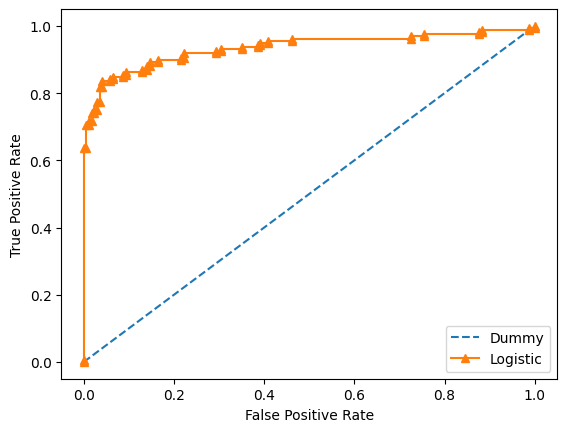

In [60]:
plt.plot(dummy_FPR,dummy_TPR,linestyle='--',label='Dummy')
plt.plot(model_FPR,model_TPR,marker='^',label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [61]:
dummy_FPR,dummy_TPR,dummy_threshold = roc_curve(y_test,dummy_model_prob)
model_FPR,model_TPR,model_threshold = roc_curve(y_test,y_prob_one)

In [62]:
model_threshold

array([       inf, 0.99991604, 0.81714395, 0.81332704, 0.76020547,
       0.75518294, 0.74867879, 0.74048397, 0.72287051, 0.7193568 ,
       0.71272141, 0.70894182, 0.6512483 , 0.65045299, 0.62232553,
       0.62222415, 0.61680562, 0.59735963, 0.58927043, 0.58874906,
       0.58306993, 0.55271146, 0.53269277, 0.52678316, 0.51907865,
       0.46183779, 0.45438562, 0.44702564, 0.44312266, 0.43513569,
       0.43381953, 0.40780215, 0.40466319, 0.36037239, 0.3588183 ,
       0.35502749, 0.3377186 , 0.28767049, 0.27425617, 0.2663963 ,
       0.26373641, 0.23904938, 0.22466084, 0.211106  , 0.21095204,
       0.20805623, 0.20636261, 0.20300963, 0.19940732, 0.18124194,
       0.17239638, 0.08194743, 0.08050025, 0.07653071, 0.0743088 ,
       0.04321955, 0.04242255, 0.0413773 , 0.04125713, 0.01570186,
       0.01205457, 0.01040062, 0.00421517])

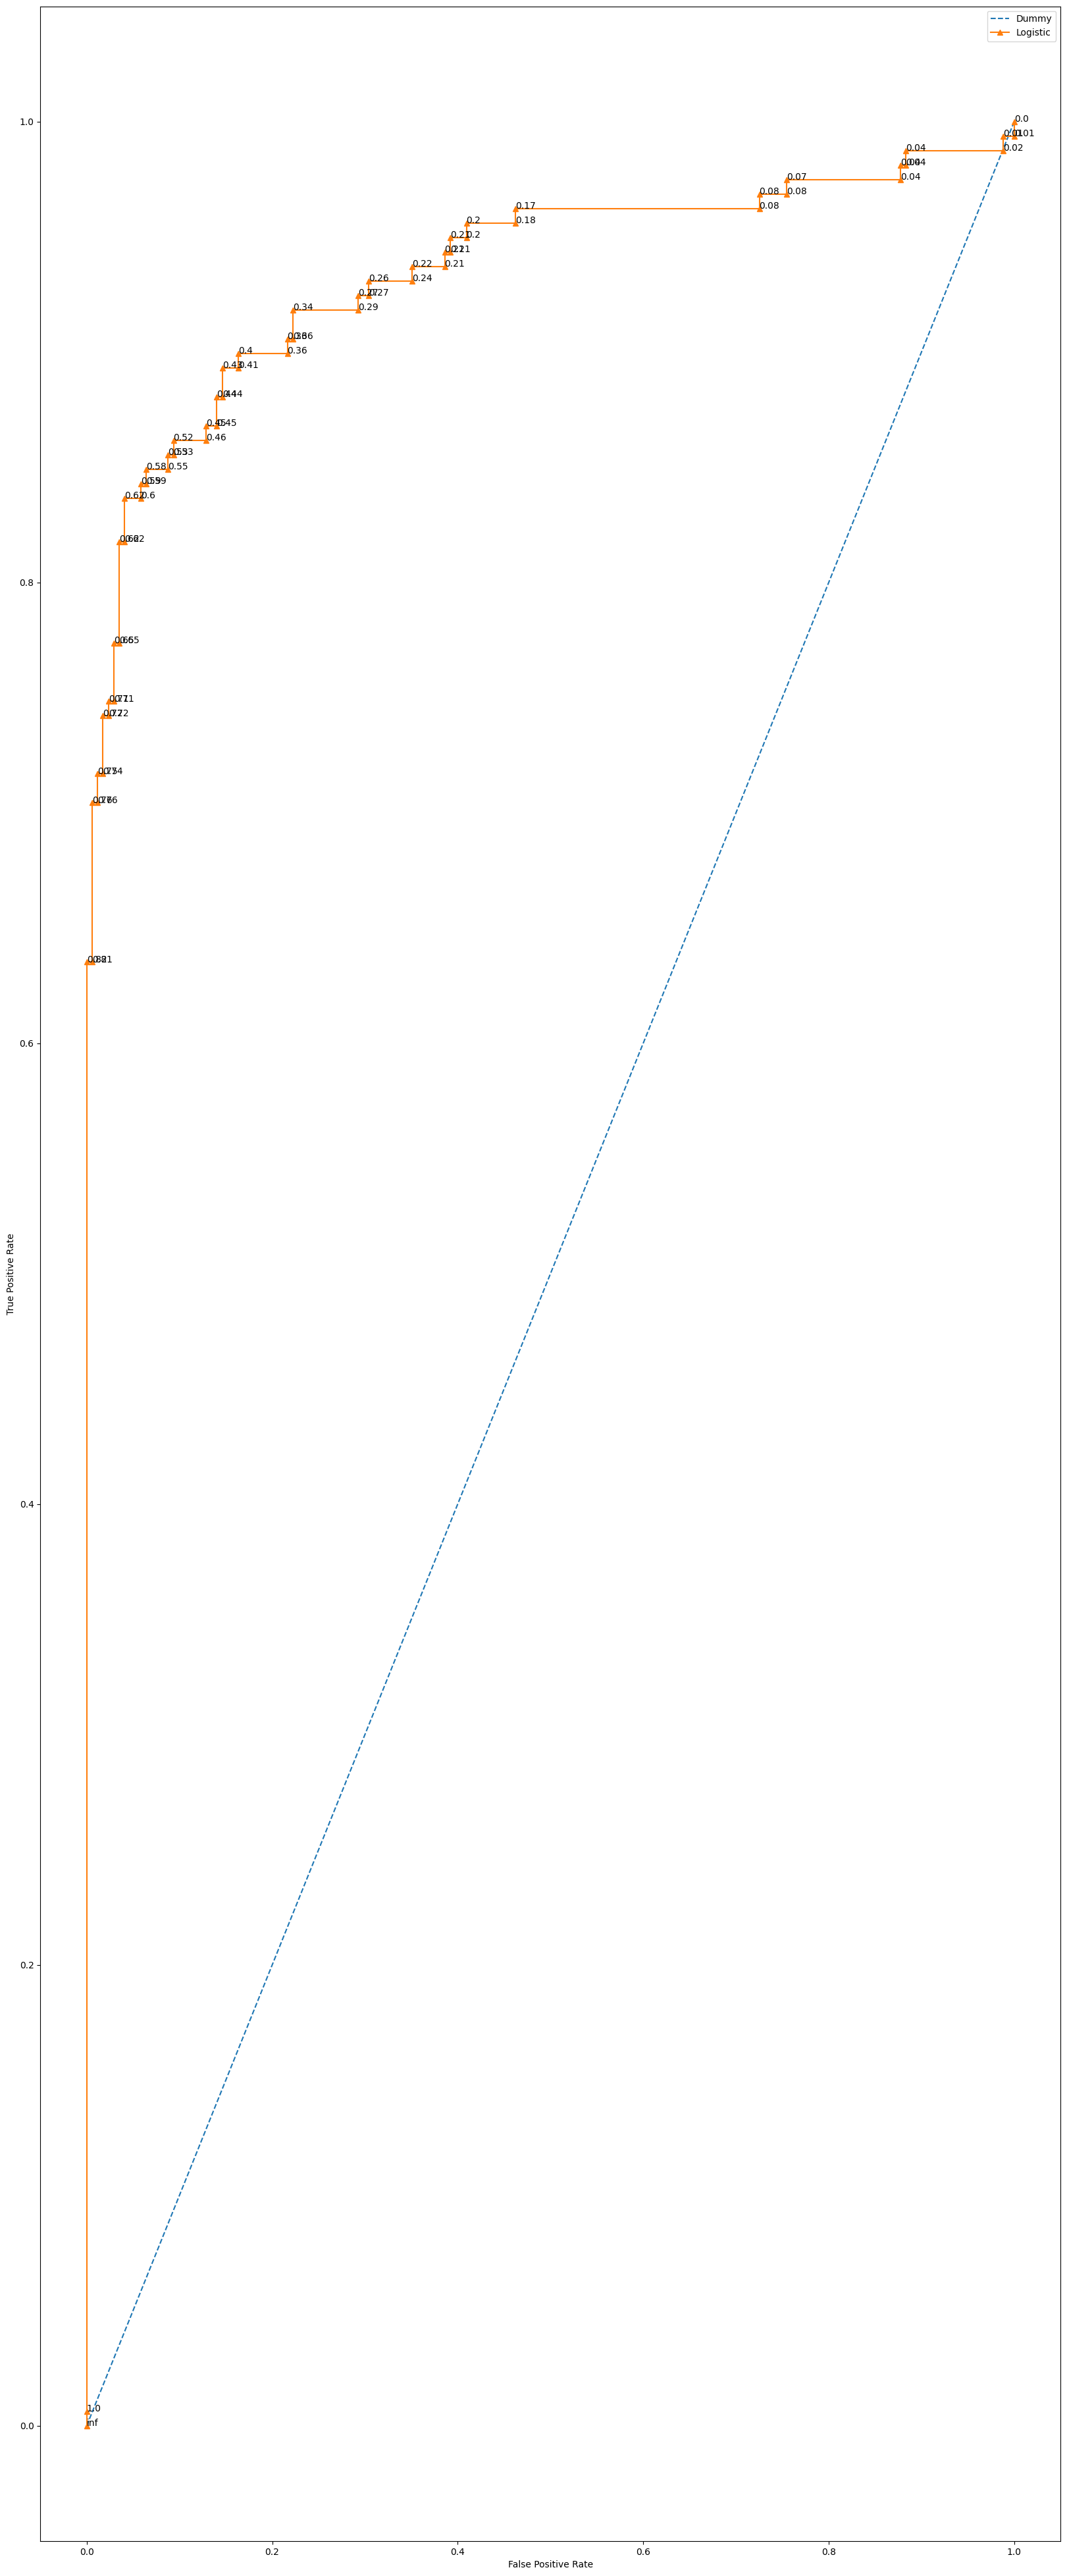

In [77]:
fig = plt.figure(figsize=(20,50))
ax = fig.add_subplot(111)

plt.plot(dummy_FPR,dummy_TPR,linestyle='--',label='Dummy')
plt.plot(model_FPR,model_TPR,marker='^',label='Logistic')

for val in zip(model_FPR,model_TPR,model_threshold):
    ax.annotate('%s' % np.round(val[2],2),xy=(val[0],val[1]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()